In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm # Colormap for time
import numpy as np
from datetime import datetime
import os



#Import personal functions
import sys
#sys.path.append("C:/Users/Olivi/OneDrive - TU Eindhoven/Soft robotic matter/GitHub/Thermal_Soft_Robotics/Functions")
sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Functions")
import FluidicSetupFunctions
from save_plot_func import save_plot


In [2]:
#Location = r"C:\Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\data_analysis"
Location = r"//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Thermal_actuation/Experimental/Fluidic/Rothmund_Pressure_release"

#Location = r"C:\\Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\GitHub\Thermal_Soft_Robotics\Thermal_actuation\Experimental\Fluidic\Membrane_valve_leak_test"
Foldernames = ["/Data/v2"]

data = FluidicSetupFunctions.LoadData(Foldernames = Foldernames,Location=Location)

Loading... Folder 1 of 1, Sample 1 of 2
Loading... Folder 1 of 1, Sample 2 of 2


In [3]:
data[0][0]

,presFesto-1,DigOut-1,AWM5-5,SSCDP05-3,Time
0,-0.000359,0.0,0.000705,-13.317183,1.0
1,-0.000189,0.0,0.000405,-9.433635,2.0
2,-0.000058,0.0,0.000166,-5.918925,3.0
3,0.000037,0.0,-0.000014,-2.759505,4.0
4,0.000100,0.0,-0.000143,0.058172,5.0
...,...,...,...,...,...
42596,0.000137,0.0,-0.003418,165.216771,42597.0
42597,0.000198,0.0,-0.003306,169.234363,42598.0
42598,0.000263,0.0,-0.003150,166.929416,42599.0
42599,0.000334,0.0,-0.002946,157.373973,42600.0


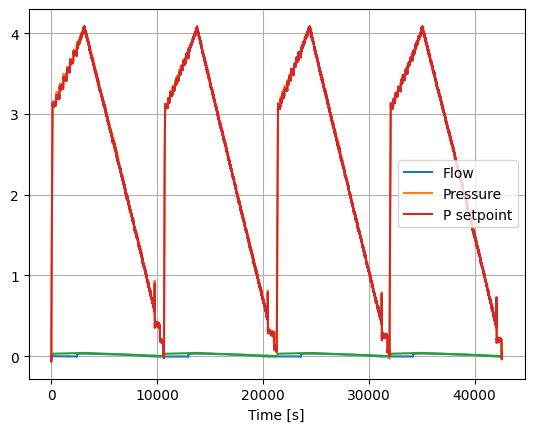

In [4]:
#Plot the profiles over time
#k =0
for i, df in enumerate(data[0]):
    flow = data[0][i]['AWM5-5'].values #SLPM
    time = data[0][i]['Time']
    P_setpoint = data[0][i]['presFesto-1'].values
    # Check which sensor data is available in the DataFrame columns
    if 'SSCDP15-3' in df.columns:
        P = df['SSCDP15-3'].values
        #label = len(df['SSCDP15-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX100-3' in df.columns:
        P = df['MPX100-3'].values
        #label = len(df['MPX100-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX700-2' in df.columns:
        P = df['MPX700-2'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'SSCDP05-3' in df.columns:
        P = df['SSCDP05-3'].values
    #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    else:
        print(f"Skipping experiment {i+1}: No recognizable sensor data.")
        # Skip this iteration and move to the next experiment
        
    break

plt.plot(time,flow, label = 'Flow')
plt.plot(time,P/1000, label = "Pressure")
plt.plot(time, P_setpoint)
plt.plot(time,data[0][i]['presFesto-1']*100,label ="P setpoint")
plt.legend()
plt.xlabel('Time [s]')
#plt.ylim(-0.1,0.1)
plt.grid()

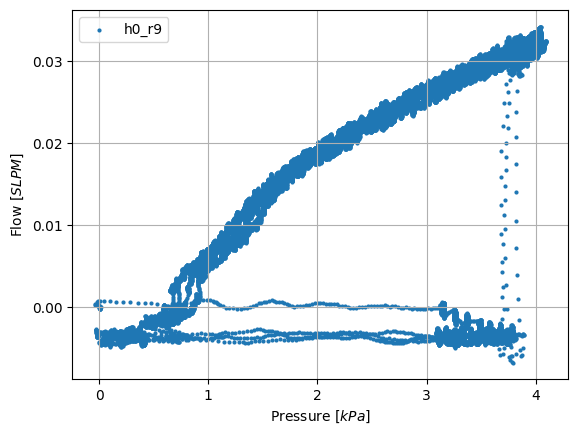

In [5]:
plt.figure()  # Create a new figure for each experiment
for i, df in enumerate(data[0]):
    
    # Check which sensor data is available in the DataFrame columns
    if 'SSCDP15-3' in df.columns:
        P = df['SSCDP15-3'].values
        #label = len(df['SSCDP15-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX100-3' in df.columns:
        P = df['MPX100-3'].values
        #label = len(df['MPX100-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX700-2' in df.columns:
        P = df['MPX700-2'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'SSCDP05-3' in df.columns:
        P = df['SSCDP05-3'].values
    #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    else:
        print(f"Skipping experiment {i+1}: No recognizable sensor data.")
        continue  # Skip this iteration and move to the next experiment
   
        
    # Assuming Time is common in all DataFrames and is in a column named 'Time'
    #Time = df['Time'].values
    flow = data[0][i]['AWM5-5'].values #SLPM

    plt.scatter( P/1000,flow, label=data[1]['Samplename'][i][5:],marker='.', linewidth=0.000001)
    plt.xlabel('Pressure [$kPa$]')
    plt.ylabel('Flow [$SLPM$]')
    plt.legend(loc='upper left')
    #plt.title(f'Experiment {i+1}')
    break 
  
#plt.xlim(0,8) 
plt.grid()
#plt.xlim(0,5)
plt.show() 

In [77]:
# Slice data per run 
start = 0
run_count = 1  # Counter for run numbe
flow = data[0][0]['AWM5-5'].values

data_sliced = []

while start < len(data[0][0]['DigOut-1']):
    start = np.argmax(data[0][0]['DigOut-1'][start:] == 1) +start  # Correcting index for slicing
    end = np.argmax(data[0][0]['DigOut-1'][start:] == 0)+start   # Correcting index for slicing
    if end <= start:  # Break if no more valid segments are found
        break
    # Reschale the flow data to compensate for drifting 
    first_value = flow[start]


    flow_rescaled =flow[start:end] - first_value

       # Create a DataFrame for this run
    run_df = pd.DataFrame({
        'Time': np.arange(start, end),  # You can replace this with the actual time data if you have it
        'Rescaled_Flow': flow_rescaled,
        'Pressure': P[start:end] / 1000  # Assuming P is already an array
    })

    # Append this DataFrame to the list
    data_sliced.append(run_df)

    first_start = np.argmax(data[0][0]['DigOut-1'] == 1)

    
    
    start = end + 5  # Move to next segment
    run_count += 1  # Increment run counter

    


0
1
2
3


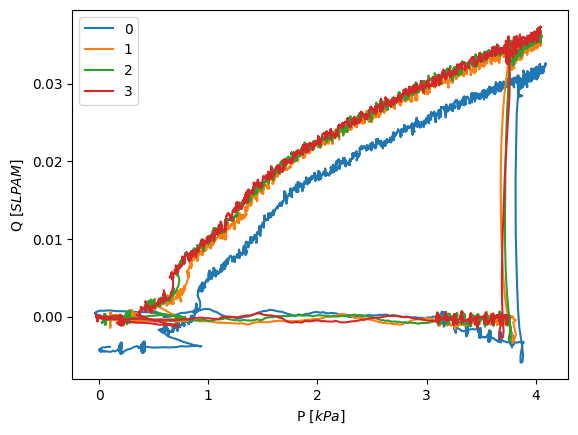

In [80]:
P_open = []
for ii,_ in enumerate(data_sliced):    
    Q=data_sliced[ii]['Rescaled_Flow']
    P_sliced=data_sliced[ii]['Pressure']
    plt.plot(P_sliced,Q, label=ii)
    print(ii)
    opening_index=np.argmax(Q > 0.01)
    P_open.append(P_sliced[opening_index])

plt.ylabel('Q [$SLPAM$]')
plt.xlabel('P [$kPa$]')
plt.legend()   

In [79]:
P_open

[3.8167259852529307, 3.681412455504649, 3.7181809051613994, 3.6970552472666647]

# Create a colormap
colormap = cm.get_cmap('viridis')

# Normalize the time variable to fit the colormap scale
norm_time = (time - time.min()) / (time.max() - time.min())

# Loop through and plot each segment with corresponding color
for i in range(len(time) - 1):
    plt.scatter(P[i:i+10]/1000, flow[i:i+10], color=colormap(norm_time[i]))

# Add a colorbar to represent the time variable
sm = cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=time.min(), vmax=time.max()))
sm.set_array([])
plt.colorbar(sm, label='Time [s]')

plt.xlabel('Pressure [kPa]')
plt.ylabel('Flow [SLPM]')
plt.title('Pressure vs Flow Colored by Time')
#plt.xlim(5,7)
#plt.ylim(-0.25, 1)


save_plot('Pressure_vs_flow')
